In [1]:
import scanpy as sc
from os.path import join, exists

In [7]:
n_cells_batch = 'all'
outdir = '/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/scIB_output/retinal_%s_donor_cell.type/integration/unscaled/hvg/R' % n_cells_batch
p = join(outdir, 'harmony.h5ad')


In [48]:
# this input contains the raw counts for all cells, and needs to be updated in the raw sesion of the object.
ad_raw = '/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_march_2021/input/input_all_cells.h5ad'
print('reading...')
ad_raw = sc.read_h5ad(ad_raw)
print('done...')

reading...
done...


In [ ]:
df = pd.read_csv('data/donor_details.tsv', sep='\t')

In [55]:
assert sum(ad.obs.index != ad_raw.obs.index) == 0
print('all good if no error')

all good if no error


In [60]:
ad.raw = ad_raw

In [61]:
print('here...')

here...


In [65]:
ad.raw

AttributeError: 'Raw' object has no attribute 'layers'

In [8]:
print(exists(p), p)

True /mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/scIB_output/retinal_all_donor_cell.type/integration/unscaled/hvg/R/harmony.h5ad


In [9]:
ad = sc.read_h5ad(p)

In [19]:
print('neighbors')
sc.pp.neighbors(ad, use_rep='HARMONY')
print('umap')
sc.tl.umap(ad)
print('leiden')
sc.tl.leiden(ad)

In [40]:
ad.obs

,RNA_snn_res.0.8,batch,dataset,filename,nCount_RNA,nFeature_RNA,orig.ident,scpred_AC,scpred_Astrocyte,scpred_BC,...,scpred_Rod,scpred_max,scpred_prediction,seurat_clusters,size_factors,cell.type,batch.merged,donor,ident,leiden
AAACCTGCACCCAGTG-1-0:Wong:0,3,0,Wong,Retina_3B,1554.0,545,0,1.376991e-07,0.000028,0.000057,...,0.999978,0.999978,Rod,3,1.023493,Rod,140,Wong_donor3,Wong_donor3,1
AAACCTGTCTATCCTA-1-0:Wong:0,9,0,Wong,Retina_3B,905.0,397,0,4.611996e-03,0.000073,0.000165,...,0.000176,0.999648,HC,9,0.609796,HC,140,Wong_donor3,Wong_donor3,4
AAACGGGAGCAGACTG-1-0:Wong:0,0,0,Wong,Retina_3B,400.0,235,0,4.067842e-07,0.000014,0.000087,...,0.999962,0.999962,Rod,0,0.305145,Rod,140,Wong_donor3,Wong_donor3,0
AAACGGGTCCCGGATG-1-0:Wong:0,0,0,Wong,Retina_3B,474.0,243,0,8.419816e-07,0.000012,0.000122,...,0.999916,0.999916,Rod,0,0.329595,Rod,140,Wong_donor3,Wong_donor3,1
AAAGATGCAAATCCGT-1-0:Wong:0,1,0,Wong,Retina_3B,315.0,219,0,4.195110e-07,0.000015,0.000059,...,0.999963,0.999963,Rod,1,0.312810,Rod,140,Wong_donor3,Wong_donor3,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTTTCGTGA-1-39:Chen_a:39,1,39,Chen_a,10x_Lobe_D017_18_13_Nu,654.0,325,0,8.383034e-07,0.000036,0.000028,...,0.999829,0.999829,Rod,1,0.543456,Rod,33,Chen_D017_13,Chen_D017_13,0
TTTGTTGTCATGAGTC-1-39:Chen_a:39,4,39,Chen_a,10x_Lobe_D017_18_13_Nu,627.0,356,0,6.765336e-05,0.001598,0.000098,...,0.000167,0.990593,MG,4,0.410273,MG,33,Chen_D017_13,Chen_D017_13,3
TTTGTTGTCCTGTAAG-1-39:Chen_a:39,0,39,Chen_a,10x_Lobe_D017_18_13_Nu,781.0,357,0,4.776147e-06,0.000022,0.000101,...,0.999834,0.999834,Rod,0,0.611342,Rod,33,Chen_D017_13,Chen_D017_13,0
TTTGTTGTCGAAACAA-1-39:Chen_a:39,0,39,Chen_a,10x_Lobe_D017_18_13_Nu,1009.0,480,0,1.915799e-07,0.000018,0.000052,...,0.999957,0.999957,Rod,0,0.758877,Rod,33,Chen_D017_13,Chen_D017_13,1


In [26]:
from matplotlib import rcParams

In [29]:
rcParams['figure.dpi'] = 120
rcParams['figure.facecolor'] = 'white'

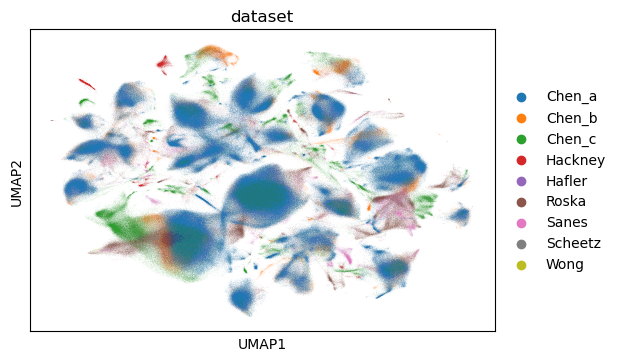

In [30]:
sc.pl.umap(ad, color='dataset')

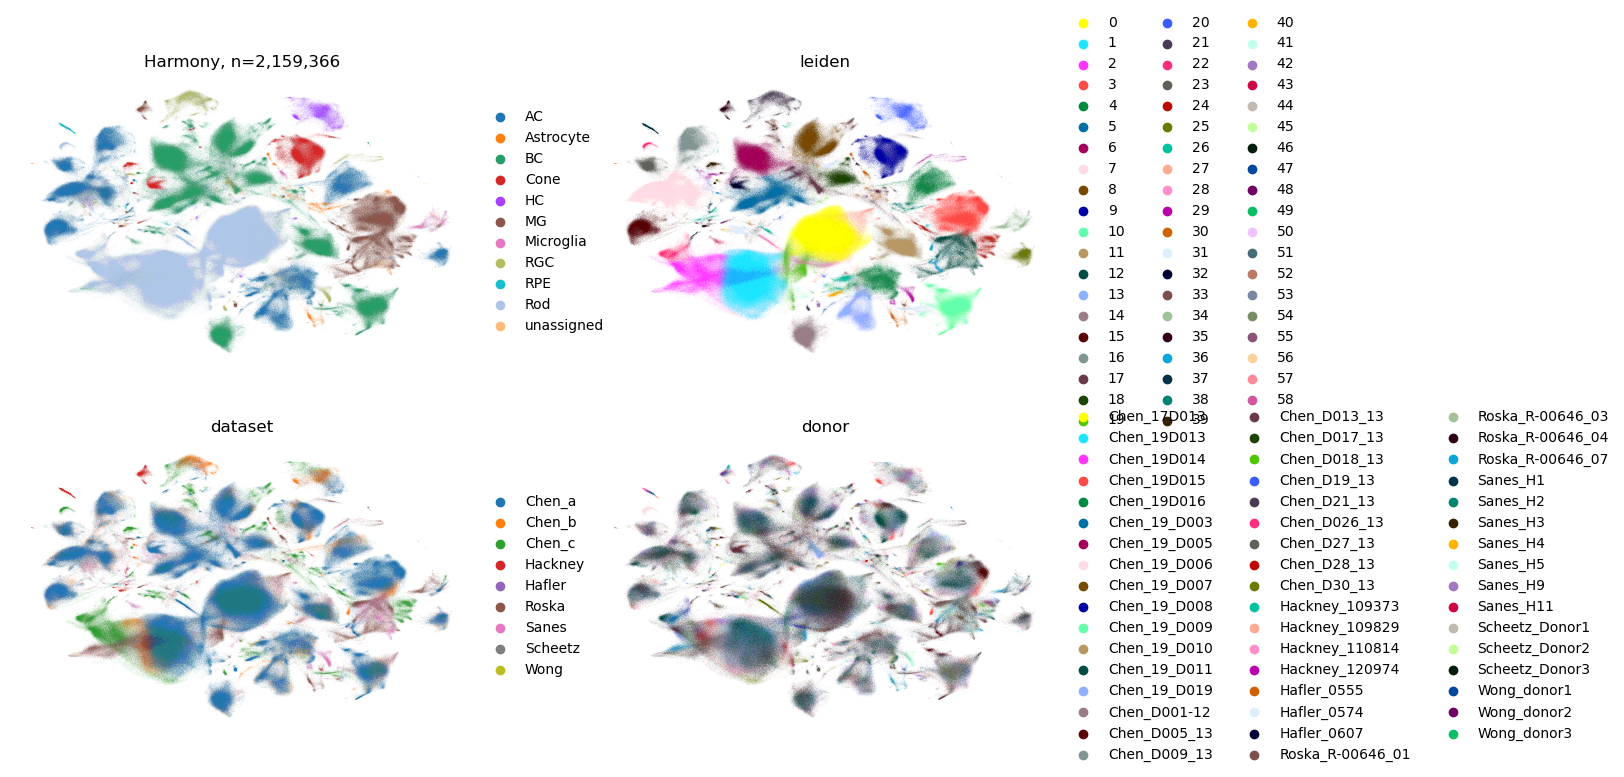

In [45]:
sc.pl.umap(ad, color=['cell.type', 'leiden', 'dataset', 'donor'], frameon=False, title=['Harmony, n=%s' % '{:,}'.format(ad.shape[0])], ncols=2)

Check some markers genes in Rods because of suspicious behavior there

View of AnnData object with n_obs × n_vars = 819224 × 2000
    obs: 'RNA_snn_res.0.8', 'batch', 'dataset', 'filename', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'scpred_AC', 'scpred_Astrocyte', 'scpred_BC', 'scpred_Cone', 'scpred_HC', 'scpred_MG', 'scpred_Microglia', 'scpred_RGC', 'scpred_RPE', 'scpred_Rod', 'scpred_max', 'scpred_prediction', 'seurat_clusters', 'size_factors', 'cell.type', 'batch.merged', 'donor', 'ident', 'leiden'
    uns: 'neighbors', 'umap', 'dataset_colors', 'cell.type_colors', 'leiden', 'leiden_colors', 'donor_colors', 'rank_genes_groups'
    obsm: 'HARMONY', 'X_emb', 'X_pca', 'X_umap'
    layers: 'logcounts'
    obsp: 'distances', 'connectivities'

In [99]:
ad_rod = ad[ad.obs['cell.type'] == 'Rod',:]
# at least 50 cells or more in each cluster
ad_rod = ad_rod[ad_rod.obs['leiden'].map(ad_rod.obs['leiden'].value_counts().to_dict()) > 1000,:]

In [100]:
sc.tl.rank_genes_groups(ad_rod, 'leiden') # .obs['leiden'].value_counts()

Trying to set attribute `.uns` of view, copying.


In [116]:
print('here...')

here...


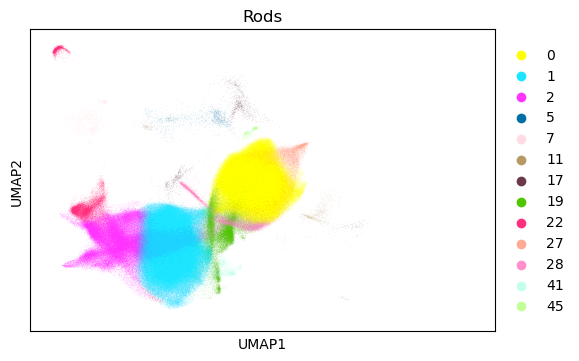

In [101]:
sc.pl.umap(ad_rod, color='leiden', title='Rods')

In [115]:
ad_rod.var[ad_rod.var.index.str.startswith('MT-')]

""
MT-CO2
MT-CO3
MT-ND5
MT-ND1
MT-ND2
MT-ATP6
MT-ND3
MT-ND4
MT-CYB
MT-CO1


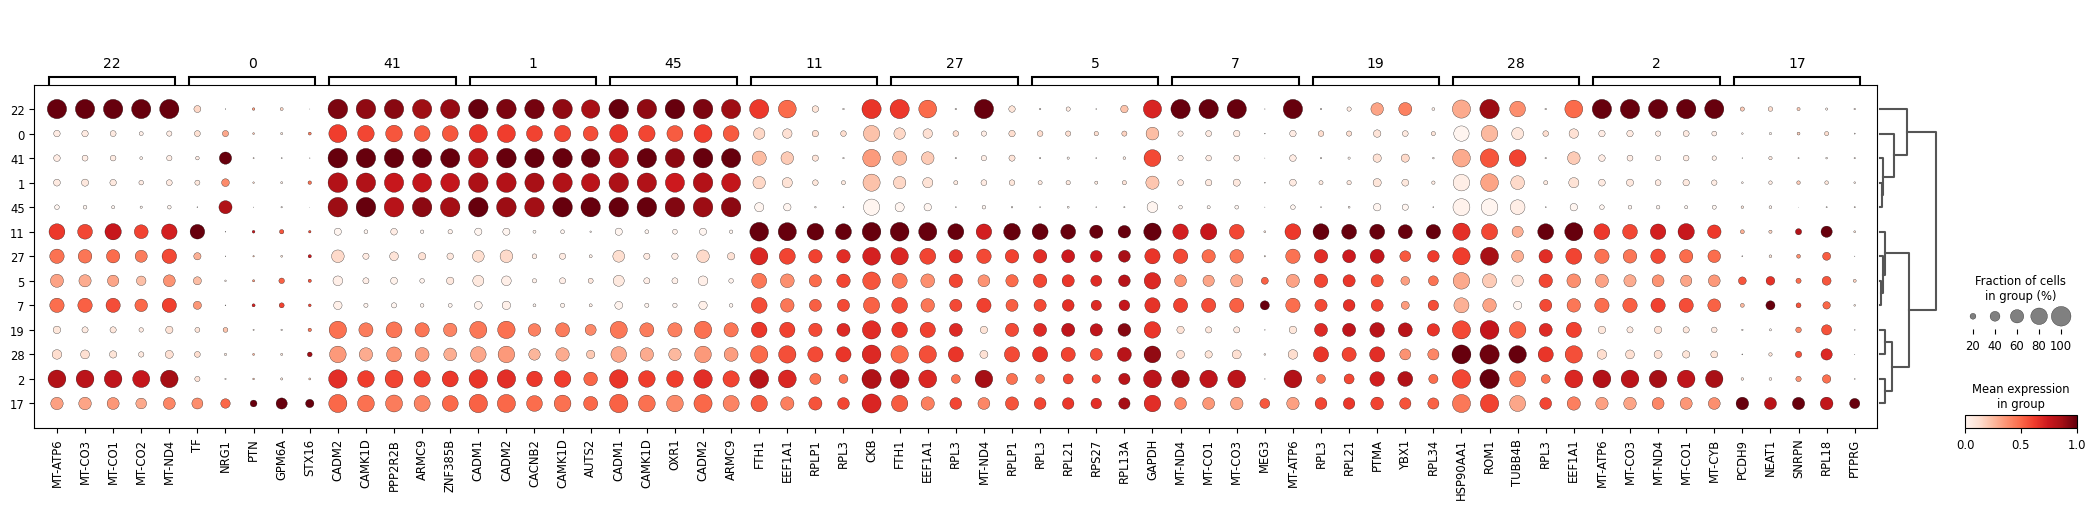

In [106]:
sc.pl.rank_genes_groups_dotplot(ad_rod, n_genes=5, standard_scale='var')#  ncols=5)

In [ ]:
sc.pl.umap(ad)

In [34]:
import screg as scr

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/scFates/tools/graph_tools.py:28: UserWarning: ElPiGraph package is not installed         
Please use "pip install git+https://github.com/j-bac/elpigraph-python.git" to install it
  \nPlease use "pip install git+https://github.com/j-bac/elpigraph-python.git" to install it'


In [35]:
from os.path import exists, join
scr.constants.ANNOTATIONS_DIRECTORY = '/storage/groups/ml01/datasets/annotations'
scr.constants.SCREG_DATA_DIRECTORY = '/storage/groups/ml01/workspace/ignacio.ibarra/screg/data'

genome_id = 'hg38'
chip_seeker_outdir = join(scr.constants.ANNOTATIONS_DIRECTORY, 'archetypes/dhs')
outpath = join(chip_seeker_outdir, 'consensus_footprints_%s.csv.gz' % genome_id)
print(exists(outpath), outpath)

True /storage/groups/ml01/datasets/annotations/archetypes/dhs/consensus_footprints_hg38.csv.gz


In [18]:
# this defines if we want to run score genes one gene at the time (False), or by gene groups (False
score_by_gene = False

In [19]:
cluster_key = 'leiden_integrated_moderate'

In [117]:
scr.constants.ARCHETYPES_OPTIONS
arch_opts = scr.constants.ARCHETYPES_OPTIONS # {'hg38_DHS_Distal Intergenic', 'hg38_DHS_Promoter'}

In [ ]:
rows_reordered_by_arch_opt = {}
for arch_opt in arch_opts:
    print('')
    print('next', arch_opt)
    scr.tl.load_archetypes(ad, option=arch_opt)
    # scoring based on score genes from annotation + footprits with archetypes.
    scr.tl.score_archetypes(ad, by_arch=arch_opt, score_by_gene=score_by_gene)
    
    # calculate TF activity (ROC-AUC of separatation between clusters)
    scr.tl.tf_activity(ad, by=arch_opt, cluster_key=cluster_key)
    
    rcParams['figure.dpi'] = 80
    rows_reordered = scr.pl.tf_activity(ad, cluster_key=cluster_key, tf_act_key=arch_opt, figsize=[7,9],
                                        title=arch_opt, yticklabels=True)
    rows_reordered_by_arch_opt[arch_opt] = rows_reordered

In [6]:
ad.obsm['X_scanorama']

array([[-0.33003678, -0.04142274,  0.21859015, ...,  0.01683527,
         0.00564583, -0.01184694],
       [-0.06861168, -0.35366278,  0.07414603, ...,  0.01912645,
        -0.00649645, -0.03498819],
       [-0.0358382 , -0.34058111,  0.01280338, ...,  0.010605  ,
         0.00363878, -0.01909892],
       ...,
       [ 0.03130573,  0.32635961,  0.04900152, ...,  0.01008758,
         0.05333914,  0.01984063],
       [ 0.06952657,  0.3694394 ,  0.02077419, ..., -0.02576977,
         0.01567679,  0.03117741],
       [ 0.06186336,  0.35668882,  0.02603323, ..., -0.03151318,
         0.00249583,  0.02083241]])

In [7]:
ad.obsm['X_emb']

array([[-0.33003678, -0.04142274,  0.21859015, ...,  0.01683527,
         0.00564583, -0.01184694],
       [-0.06861168, -0.35366278,  0.07414603, ...,  0.01912645,
        -0.00649645, -0.03498819],
       [-0.0358382 , -0.34058111,  0.01280338, ...,  0.010605  ,
         0.00363878, -0.01909892],
       ...,
       [ 0.03130573,  0.32635961,  0.04900152, ...,  0.01008758,
         0.05333914,  0.01984063],
       [ 0.06952657,  0.3694394 ,  0.02077419, ..., -0.02576977,
         0.01567679,  0.03117741],
       [ 0.06186336,  0.35668882,  0.02603323, ..., -0.03151318,
         0.00249583,  0.02083241]])

In [69]:
outdir = '/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_march_2021/output'
outpath = join(outdir, 'unscaled_hvg_harmony.h5ad')
print(outpath)

/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_march_2021/output/unscaled_hvg_harmony.h5ad


In [118]:
ls -lthr /mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_march_2021/output/unscaled_hvg_harmony.h5ad


-rw-r--r--. 1 ignacio.ibarra OG-ICB-User 30G Jun 15 17:50 /mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_march_2021/output/unscaled_hvg_harmony.h5ad


In [67]:
!mkdir outdir

In [70]:
ad.write(outpath)

In [71]:
print('done...')

done...
